In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [3]:
X_tf = X.copy()

X_tf["MedInc"], param = stats.yeojohnson(X["MedInc"])
print("Optimal lambda: ", param)

Optimal lambda:  -0.1985098937827175


In [4]:
def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

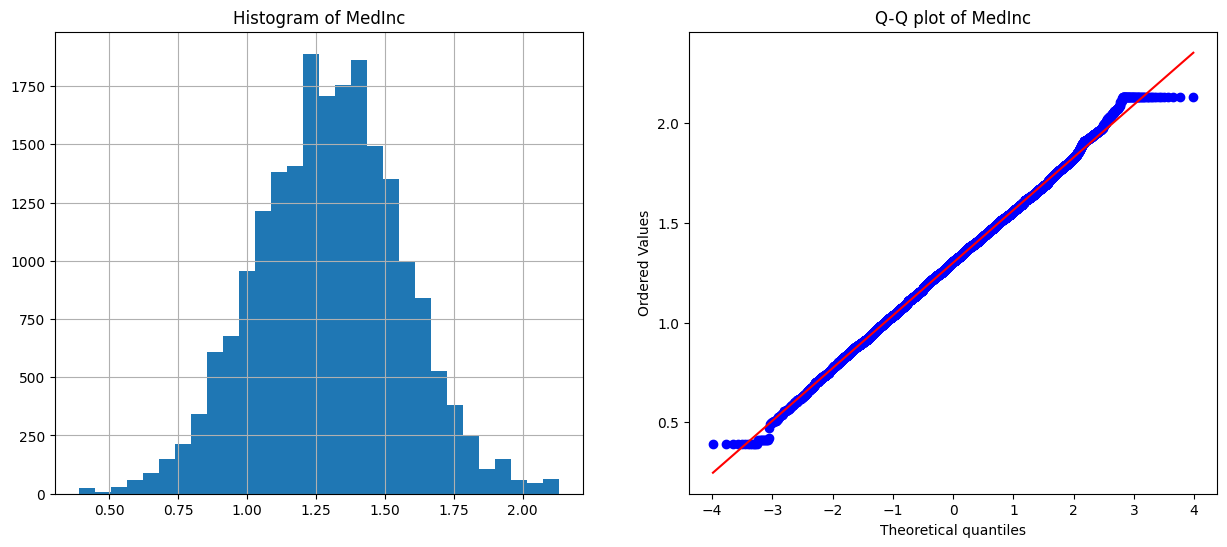

In [5]:
diagnostic_plots(X_tf, "MedInc")

In [6]:
# Same with sklearn
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [9]:
variables = list(X.columns)
variables

def make_qqplot(df):
    plt.figure(figsize=(10,6), constrained_layout=True)
    for i in range(6):
        ax = plt.subplot(2, 3, i+1)
        var = variables[i]
        stats.probplot((df[var]), dist="norm", plot=plt)
        ax.set_title(var)
    plt.show()

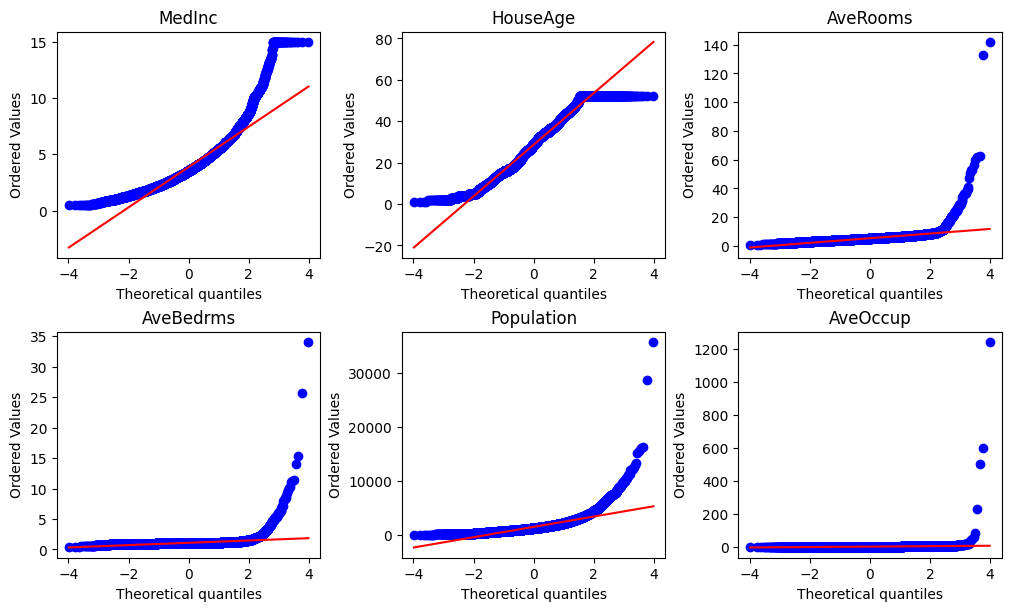

In [10]:
make_qqplot(X)

In [11]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method="yeo-johnson", standardize=False)
transformer.set_output(transform="pandas")

transformer.fit(X)

PowerTransformer(standardize=False)

In [12]:
transformer.lambdas_

array([-0.19850989,  0.80814809, -0.5536698 , -4.39408222,  0.23352364,
       -0.90134563])

In [13]:
X_tf = transformer.transform(X)
X_tf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,1.803599,24.133444,1.234372,0.217303,12.223224,0.755821
1,1.801958,13.807367,1.202460,0.216060,22.087944,0.710445
2,1.724579,29.380778,1.280312,0.218341,13.970688,0.776570
3,1.578385,29.380778,1.182107,0.218334,14.478725,0.755137
4,1.354895,29.380778,1.204470,0.218489,14.533326,0.718551
...,...,...,...,...,...,...
20635,0.857611,15.981965,1.139177,0.219428,16.384868,0.756273
20636,1.121673,12.126445,1.196652,0.221895,12.613530,0.799990
20637,0.901462,11.555094,1.148759,0.219202,17.247984,0.733858
20638,0.950502,12.126445,1.155919,0.220045,15.761405,0.711984


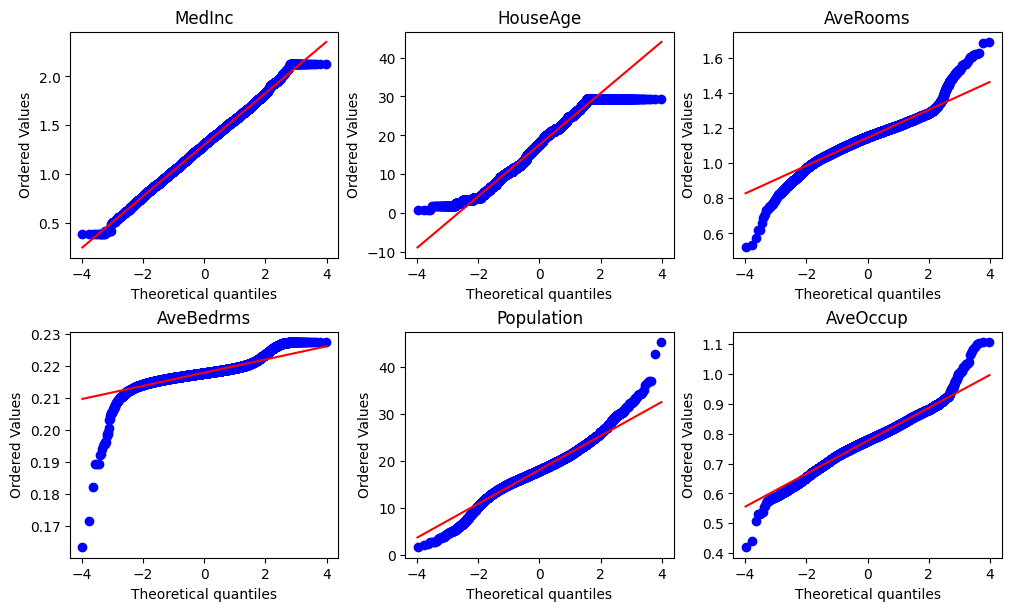

In [14]:
make_qqplot(X_tf)